# Retail Case Study Python

In [37]:
import pandas as pd 
import numpy as np

In [38]:
cust=pd.read_csv('Customer.csv')
prod=pd.read_csv('prod_cat_info.csv')
tran=pd.read_csv('Transactions.csv',parse_dates=True)

In [39]:
display(cust.head(5))
display(tran.head(5))
display(prod.head(5))

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [40]:
cust.info()    #here dob is not stored is correct format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [41]:
cust['DOB']=pd.to_datetime(cust['DOB'],format='mixed',errors='coerce')

In [42]:
tran.info()  # #here tran_date is not stored is correct format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [43]:
tran['tran_date']=pd.to_datetime(tran['tran_date'],format='mixed',errors='coerce')

In [44]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes


In [45]:
cust.shape,tran.shape,prod.shape

((5647, 4), (23053, 10), (23, 4))

In [46]:
#customer_id's that are in customers but not in transactions
missing_cust_ids_in_cust = cust[~( cust['customer_Id'].isin(tran['cust_id']))]
missing_cust_ids_in_cust['customer_Id'].shape[0]

#it means 141 customers are there who are registered but not made any transactions

141

In [47]:
#customer_id's that are in transactions but not in customer
missing_cust_ids_in_tran = tran[~( tran['cust_id'].isin(cust['customer_Id']))]
missing_cust_ids_in_tran['cust_id'].shape[0]

#it means all custoers that are in transactions are present in cusotmer table 

0

In [48]:
cust_tran=pd.merge(tran,cust,how='inner',left_on='cust_id',right_on='customer_Id') ## Ensures only customers with transactions are included
data=pd.merge(cust_tran,prod,left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'],how='inner')# Ensures matching products only
data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-11-05,F,8.0,Electronics,5,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-08-06,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY


In [49]:
# Step 1: Compare suspected duplicates
print((data['cust_id'] == data['customer_Id']).all())
print((data['prod_subcat_code'] == data['prod_sub_cat_code']).all())

# Step 2: Drop duplicate columns if values are identical
data.drop(columns=['customer_Id', 'prod_sub_cat_code'], inplace=True)


True
True


In [50]:
# rearrangement of data
new_order = [
                'transaction_id', 'tran_date',
                'cust_id', 'DOB', 'Gender', 'city_code',
                'prod_cat_code', 'prod_cat', 'prod_subcat_code', 'prod_subcat',
                'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'
]
data = data[new_order]
data.head()

,transaction_id,tran_date,cust_id,DOB,Gender,city_code,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,2014-02-28,270351,1981-09-26,M,5.0,1,Clothing,1,Women,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,2014-02-27,270384,1973-11-05,F,8.0,3,Electronics,5,Computers,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,2014-02-24,273420,1992-07-27,M,8.0,5,Books,6,DIY,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,2014-02-24,271509,1981-08-06,M,3.0,6,Home and kitchen,11,Bath,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,2014-02-23,273420,1992-07-27,M,8.0,5,Books,6,DIY,-2,-791,166.110,-1748.110,TeleShop


In [51]:
data.shape

(23053, 15)

In [52]:
print(' a. column names and their corresponding data types \n \n',data.dtypes)


 a. column names and their corresponding data types 
 
 transaction_id               int64
tran_date           datetime64[ns]
cust_id                      int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
prod_cat_code                int64
prod_cat                    object
prod_subcat_code             int64
prod_subcat                 object
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
dtype: object


In [53]:
print('\n b. Top/Bottom 10 observations \n\n',data.head(10).tail(10))



 b. Top/Bottom 10 observations 

    transaction_id  tran_date  cust_id        DOB Gender  city_code  \
0     80712190438 2014-02-28   270351 1981-09-26      M        5.0   
1     29258453508 2014-02-27   270384 1973-11-05      F        8.0   
2     51750724947 2014-02-24   273420 1992-07-27      M        8.0   
3     93274880719 2014-02-24   271509 1981-08-06      M        3.0   
4     51750724947 2014-02-23   273420 1992-07-27      M        8.0   
5     97439039119 2014-02-23   272357 1982-09-10      F        6.0   
6     45649838090 2014-02-22   273667 1981-05-29      M        9.0   
7     22643667930 2014-02-22   271489 1971-04-21      M        9.0   
8     79792372943 2014-02-22   275108 1971-04-11      F        8.0   
9     50076728598 2014-02-21   269014 1979-11-27      F        3.0   

   prod_cat_code          prod_cat  prod_subcat_code          prod_subcat  \
0              1          Clothing                 1                Women   
1              3       Electronics      

In [54]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
summ=data.describe().T
summ.loc[:,'min':'max']

,min,25%,50%,75%,max
transaction_id,3268991.0,24938639453.0,50093131361.0,75329995679.0,99987549630.0
tran_date,2011-01-02 00:00:00,2011-10-31 00:00:00,2012-08-12 00:00:00,2013-05-18 00:00:00,2014-12-02 00:00:00
cust_id,266783.0,268935.0,270980.0,273114.0,275265.0
DOB,1970-01-02 00:00:00,1975-09-22 00:00:00,1981-06-23 00:00:00,1987-05-19 00:00:00,1992-12-29 00:00:00
city_code,1.0,3.0,5.0,8.0,10.0
prod_cat_code,1.0,2.0,4.0,5.0,6.0
prod_subcat_code,1.0,3.0,5.0,10.0,12.0
Qty,-5.0,1.0,3.0,4.0,5.0
Rate,-1499.0,312.0,710.0,1109.0,1500.0
Tax,7.35,98.28,199.08,365.715,787.5


In [55]:
# d. Frequency tables for all the categorical variablle
cat_columns=data.select_dtypes(include=['object']).columns
for col in cat_columns:
  print(data[col].value_counts() ,'\n')


Gender
M    11811
F    11233
Name: count, dtype: int64 

prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64 

prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64 

Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64 



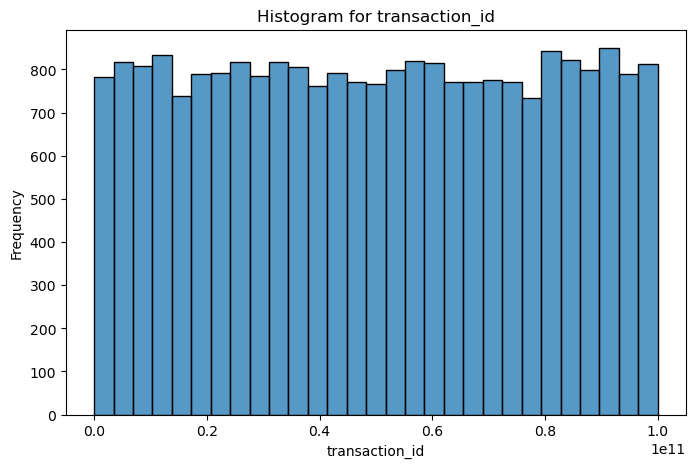

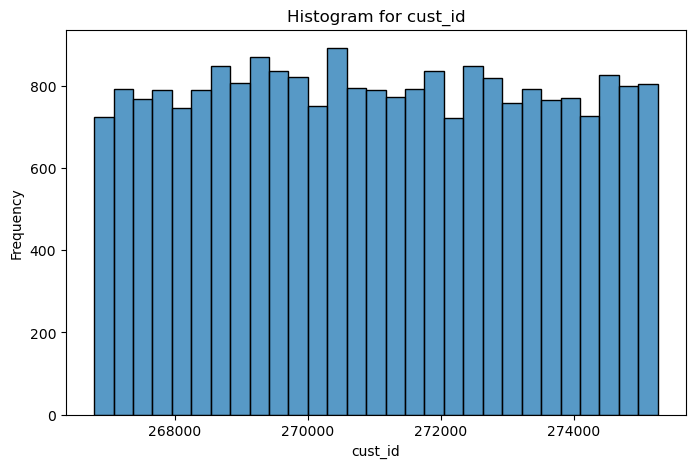

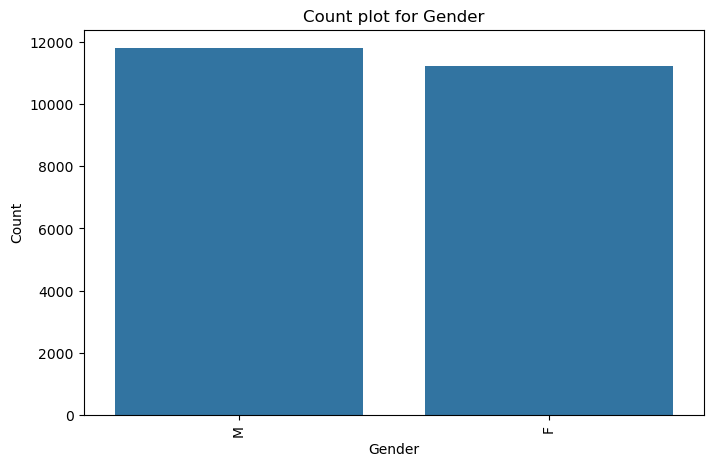

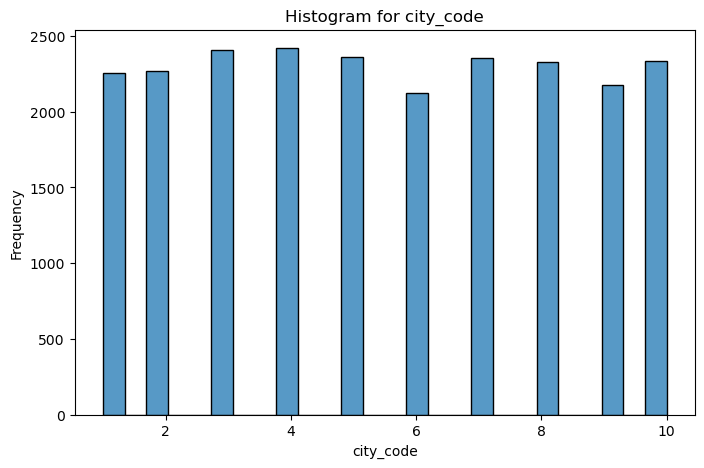

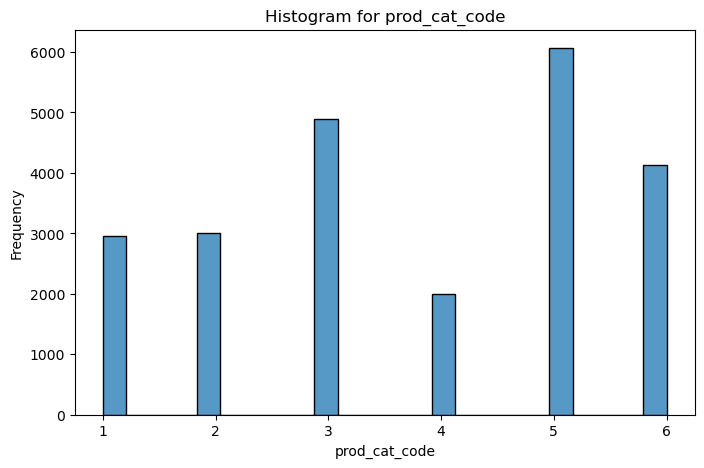

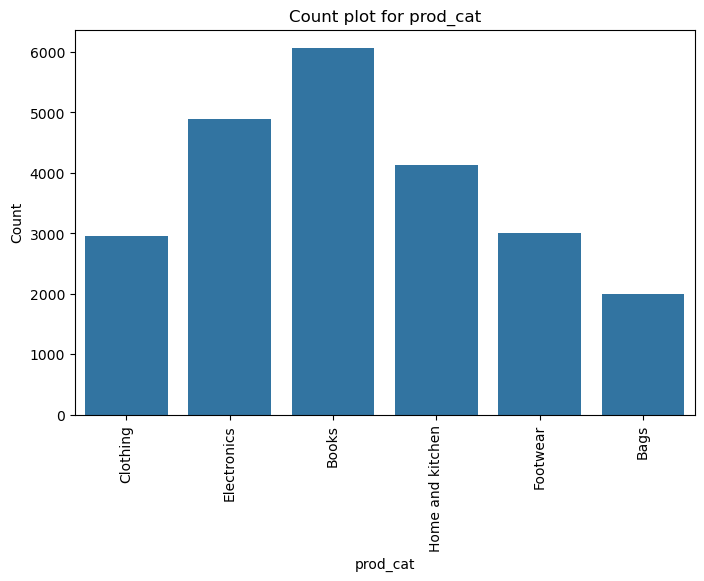

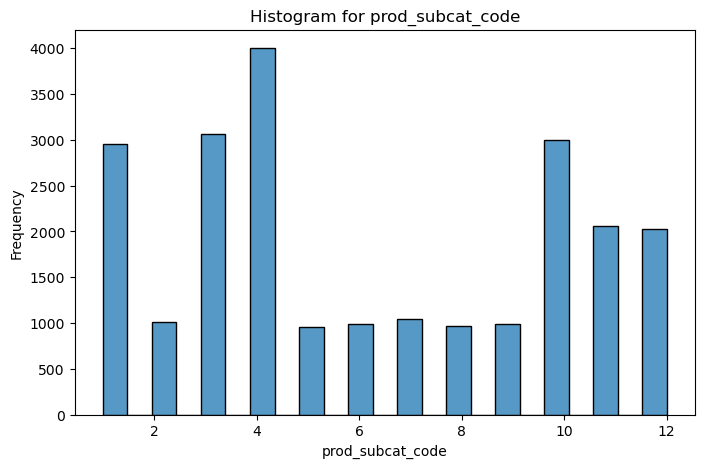

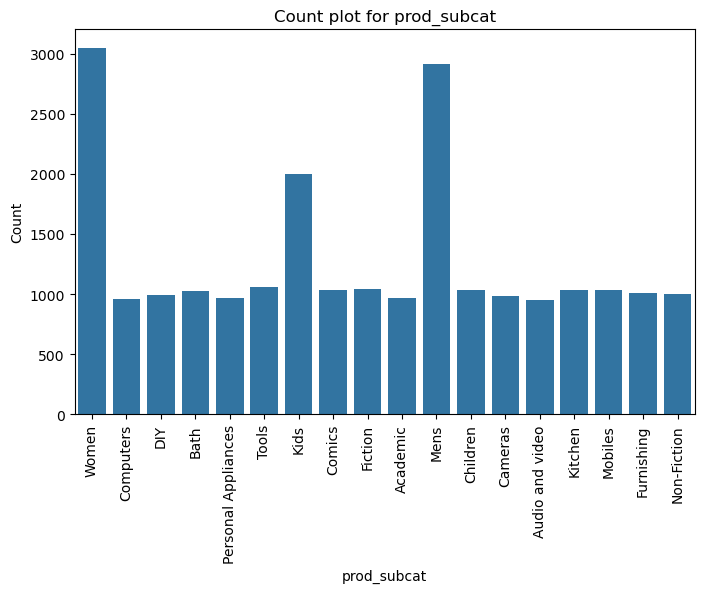

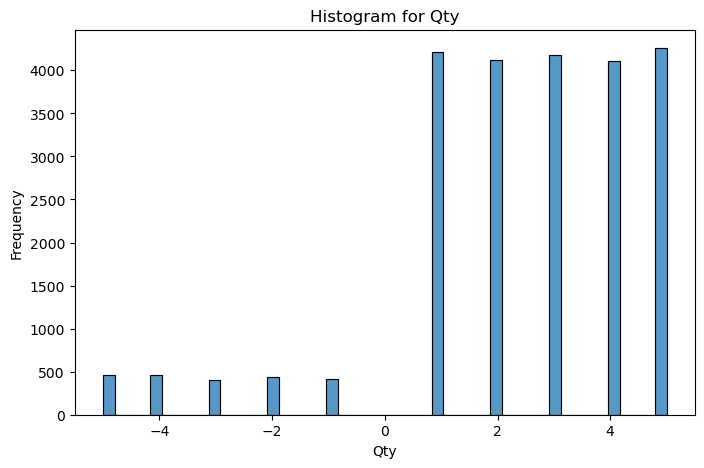

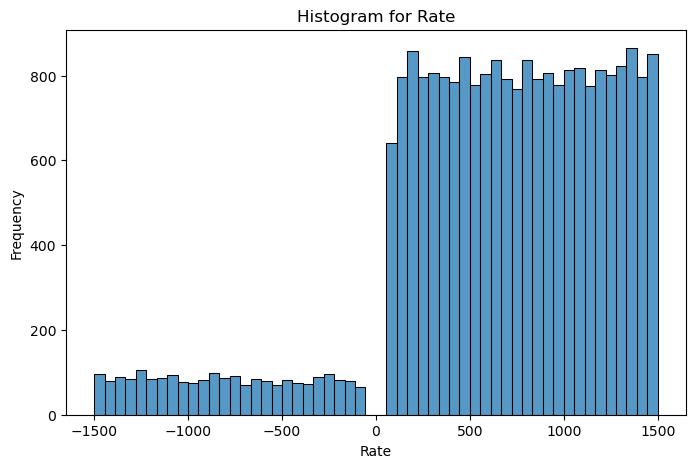

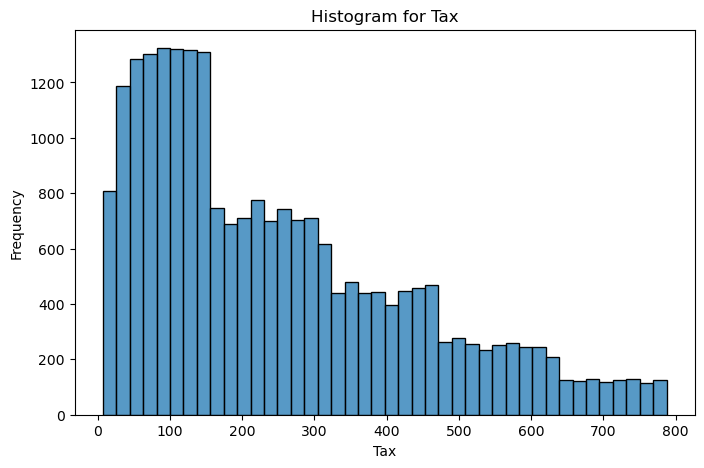

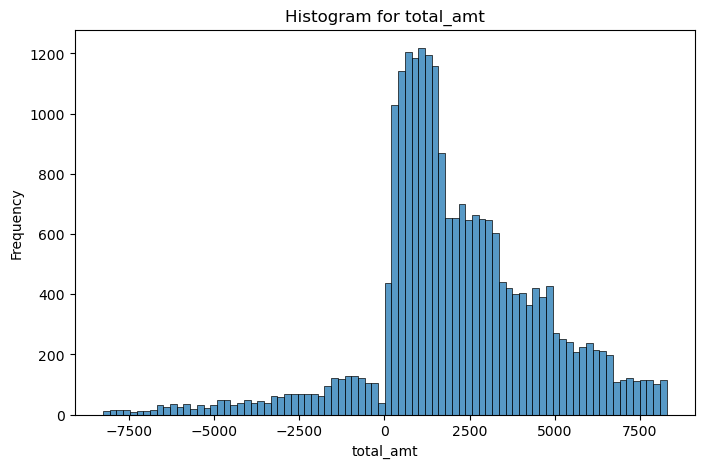

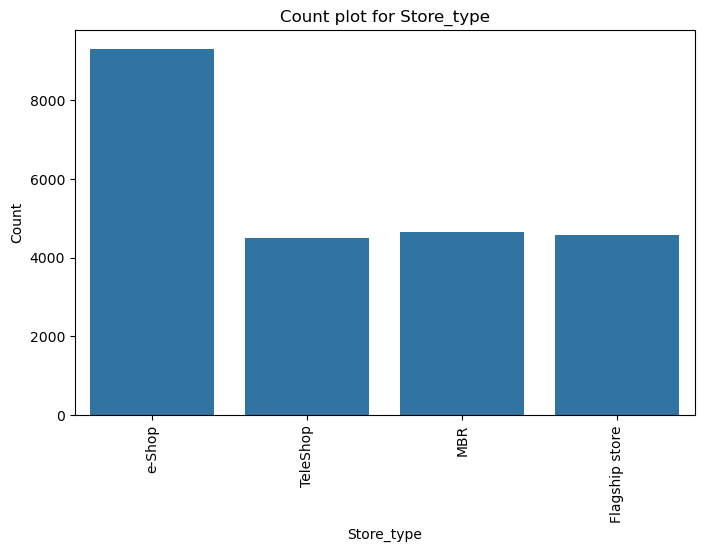

In [56]:
import matplotlib.pyplot as plt 
import seaborn as sns
continuous_var=data.select_dtypes(include=['int64','float64']).columns
categorical_var=data.select_dtypes(include=['object']).columns
for col in data.columns:
    if col in continuous_var:
        plt.figure(figsize=(8,5))
        sns.histplot(data[col])   
        plt.title(f'Histogram for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()    
        
    elif col in categorical_var:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=data[col] )    
        plt.title(f'Count plot for {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()

In [57]:
data['tran_date']=pd.to_datetime(data['tran_date'],format='mixed')
min_date=data['tran_date'].min()
max_date=data['tran_date'].max()
print(f'Time period of transaction : {min_date} to {max_date}')


Time period of transaction : 2011-01-02 00:00:00 to 2014-12-02 00:00:00


In [58]:
# b. Count of transactions where the total amount of transaction was negative
data['tran_date']=pd.to_datetime(data['tran_date'],format='mixed')
negative_tran=data[data['total_amt']<0].shape[0]
negative_tran

2177

In [59]:
gender_prod_summ=data.groupby(['Gender','prod_cat'])['Qty'].sum().reset_index()

female_cust=gender_prod_summ[gender_prod_summ['Gender']=='F']
male_cust=gender_prod_summ[gender_prod_summ['Gender']=='M']

female_popularity=female_cust.sort_values(by='Qty',ascending=False,ignore_index=True) 
male_popularity=male_cust.sort_values(by='Qty',ascending=False,ignore_index=True) 

print("Top Product Categories for Male Customers:\n",male_popularity.head())
print("\n\n Top Product Categories for Female Customers:\n",female_popularity.head())
 

Top Product Categories for Male Customers:
   Gender          prod_cat   Qty
0      M             Books  7587
1      M       Electronics  6476
2      M  Home and kitchen  5041
3      M          Clothing  3748
4      M          Footwear  3555


 Top Product Categories for Female Customers:
   Gender          prod_cat   Qty
0      F             Books  7070
1      F       Electronics  5832
2      F  Home and kitchen  4895
3      F          Footwear  3716
4      F          Clothing  3425


In [60]:
city_counts = cust['city_code'].value_counts()
city_percent = cust['city_code'].value_counts(normalize=True) * 100
city_summary = pd.DataFrame({'Customer_Count': city_counts,'Percentage': city_percent})
city_summary

,Customer_Count,Percentage
city_code,,
3.0,595,10.540301
5.0,586,10.380868
4.0,582,10.310009
7.0,575,10.186005
2.0,564,9.991143
8.0,562,9.955713
10.0,558,9.884854
1.0,551,9.760850
9.0,546,9.672276


In [61]:
city_dist = cust['city_code'].value_counts(normalize=True) * 100  # percentage
max_city_code = city_dist.idxmax()
max_city_percent = city_dist.max()
print(f"City code with max customers: {max_city_code}")
print(f"Percentage of customers from that city: {max_city_percent:.2f}%")

City code with max customers: 3.0
Percentage of customers from that city: 10.54%


In [62]:
# if we want only the max count of customers and their percentages who made transactions then 
city_cust_count=data.groupby('city_code').cust_id.nunique()  
max_cust_city=city_cust_count.idxmax()  #city that has maximum number of customers
max_cust_count=city_cust_count.max()    #maximum number of customer
total_customers=city_cust_count.sum()
percentage=(max_cust_count/total_customers)*100
print(f"The city code with the maximum customers is: {max_cust_city}")
print(f"Number of customers in this city: {max_cust_count}")
print(f"Percentage of customers from this city: {percentage:.2f}%")


The city code with the maximum customers is: 3.0
Number of customers in this city: 576
Percentage of customers from this city: 10.47%


In [63]:
store_type_summ=data.groupby('Store_type')[['total_amt','Qty']].sum()
print('Store types that sells maximum products by value :\n ')
display(store_type_summ.sort_values(by=['total_amt'],ascending=False))
print('Store types that sells maximum products by quantity :\n')
display(store_type_summ.sort_values(by=['Qty'],ascending=False))

Store types that sells maximum products by value :
 


,total_amt,Qty
Store_type,,
e-Shop,1.982482e+07,22763
Flagship store,9.715688e+06,11133
MBR,9.674486e+06,11194
TeleShop,9.364781e+06,10984


Store types that sells maximum products by quantity :



,total_amt,Qty
Store_type,,
e-Shop,1.982482e+07,22763
MBR,9.674486e+06,11194
Flagship store,9.715688e+06,11133
TeleShop,9.364781e+06,10984


In [64]:
max_value_type = store_type_summ['total_amt'].idxmax()
max_qty_type = store_type_summ['Qty'].idxmax()
print(f"Store type with max value: {max_value_type}")
print(f"Store type with max quantity: {max_qty_type}")

Store type with max value: e-Shop
Store type with max quantity: e-Shop


In [65]:
Flagship_store=data[data['Store_type']== 'Flagship store']
elec_clot_cat= Flagship_store[Flagship_store['prod_cat'].isin(['Electronics','Clothing'])]
total_amt=elec_clot_cat['total_amt'].sum()
print(f"Total amount earned from 'Electronics' and 'Clothing' in Flagship Stores: {total_amt}")

Total amount earned from 'Electronics' and 'Clothing' in Flagship Stores: 3409559.27


In [66]:
male_elec_amt=data[(data['prod_cat']=='Electronics' ) & (data['Gender']=='M')]['total_amt'].sum()
male_elec_amt

5703109.424999999

In [67]:
# Remove rows with negative amounts
positive_tran=data[(data['Qty'] > 0) & (data['Rate'] > 0) & (data['Tax'] >= 0) & (data['total_amt'] > 0)]
#unique transaction per customer
tran_per_cust=data.groupby(['cust_id']).transaction_id.nunique()
more_than_10_tran=tran_per_cust[tran_per_cust>10].count()
more_than_10_tran

6

In [74]:
data['Age']=data['tran_date'].dt.year-data['DOB'].dt.year
filtered_data=data[(data['Age']>=25) & (data['Age']<=35)] 
filtered_data.head()

,transaction_id,tran_date,cust_id,DOB,Gender,city_code,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,Qty,Rate,Tax,total_amt,Store_type,Age
0,80712190438,2014-02-28,270351,1981-09-26,M,5.0,1,Clothing,1,Women,-5,-772,405.300,-4265.300,e-Shop,33
3,93274880719,2014-02-24,271509,1981-08-06,M,3.0,6,Home and kitchen,11,Bath,-3,-1363,429.345,-4518.345,e-Shop,33
5,97439039119,2014-02-23,272357,1982-09-10,F,6.0,3,Electronics,8,Personal Appliances,-2,-824,173.040,-1821.040,TeleShop,32
6,45649838090,2014-02-22,273667,1981-05-29,M,9.0,6,Home and kitchen,11,Bath,-1,-1450,152.250,-1602.250,e-Shop,33
9,50076728598,2014-02-21,269014,1979-11-27,F,3.0,3,Electronics,8,Personal Appliances,-4,-581,244.020,-2568.020,e-Shop,35


In [77]:
Elec_cloth_spend=filtered_data[filtered_data['prod_cat'].isin(['Electronics','Books'])]['total_amt'].sum()
print(f'a. Total amount spent for “Electronics” and “Books” product categories are : {Elec_cloth_spend:.2f}₹')


a. Total amount spent for “Electronics” and “Books” product categories are : 11219541.25₹


In [78]:
jan_to_mar=filtered_data[(filtered_data['tran_date']>='2014-01-01') & (filtered_data['tran_date']<='2014-03-01')].total_amt.sum()
print(f'b. Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 : {jan_to_mar:.2f}₹')



b. Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 : 685698.91₹
